### Exploratory Data Analysis for SE1 region for year 2001.

In [1]:
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn import preprocessing as prep
from scipy.stats import pearsonr

In [2]:
reduced_data = pd.read_csv('two_years_merged_and_reduced.csv')
reduced_data.time = pd.to_datetime(reduced_data.time)
#convert 'time' column to index
reduced_data = reduced_data.set_index('time')
reduced_data = reduced_data.rename(columns= {'power-production' : 'PowerProduction'},)

In [3]:
#SE1
df_SE1 = reduced_data[reduced_data.region == 'SE1']
df_SE1 = df_SE1.drop(labels=['region'], axis=1)

In [4]:
#resampled to aggregate the hourly data into single day for all days
df_SE1_sampled_D = df_SE1.resample('D').mean()

#resampling adds datetime indexes which were not there in reduced data and fills its columns values with NaN. 
#Need to drop these rows
df_SE1_sampled_D = df_SE1_sampled_D.dropna()
df_SE1_sampled_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668 entries, 2000-01-01 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cluster           668 non-null    float64
 1   Temperature       668 non-null    float64
 2   RelativeHumidity  668 non-null    float64
 3   Wind_U            668 non-null    float64
 4   Wind_V            668 non-null    float64
 5   Pressure          668 non-null    float64
 6   CloudCover        668 non-null    float64
 7   WindGustSpeed     668 non-null    float64
 8   distance          668 non-null    float64
 9   PowerProduction   668 non-null    float64
dtypes: float64(10)
memory usage: 57.4 KB


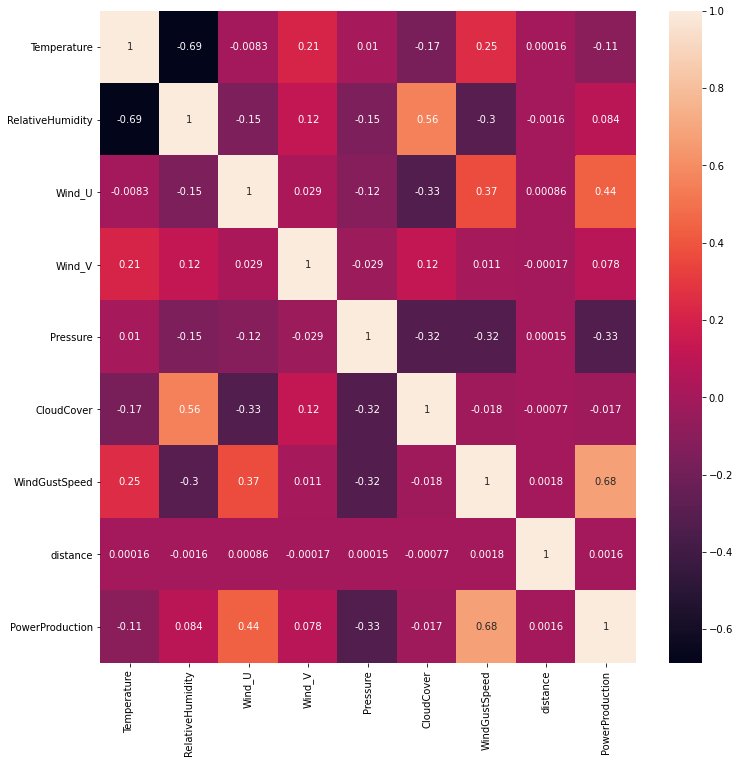

In [5]:
import seaborn as sns
df_small = df_SE1_sampled_D.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [6]:
scaler = prep.MinMaxScaler()
df_SE1_normalized_D = df_SE1_sampled_D.copy()
df_SE1_normalized_D[df_SE1_normalized_D.columns] = scaler.fit_transform(df_SE1_normalized_D[df_SE1_normalized_D.columns])

In [7]:
df_SE1_normalized_D.loc['2001-01-01':'2001-12-31'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2001-01-01 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cluster           362 non-null    float64
 1   Temperature       362 non-null    float64
 2   RelativeHumidity  362 non-null    float64
 3   Wind_U            362 non-null    float64
 4   Wind_V            362 non-null    float64
 5   Pressure          362 non-null    float64
 6   CloudCover        362 non-null    float64
 7   WindGustSpeed     362 non-null    float64
 8   distance          362 non-null    float64
 9   PowerProduction   362 non-null    float64
dtypes: float64(10)
memory usage: 31.1 KB


In [8]:
winter_sample = df_SE1_normalized_D.loc['2001-01-01': '2001-03-31']
spring_sample = df_SE1_normalized_D.loc['2001-04-01': '2001-05-31']
summer_sample = df_SE1_normalized_D.loc['2001-06-01': '2001-08-31']
autumn_sample = df_SE1_normalized_D.loc['2001-09-01': '2001-11-30']

In [9]:
df_seasons = [winter_sample, spring_sample, summer_sample, autumn_sample]

In [10]:
# speed_list = []
# power_list =[]
# for season in df_seasons:
#     max_index = season['WindGustSpeed'].idxmax()
#     #print(season['WindGustSpeed'].idxmax())
#     print('WindGustSpeed of {}: {}'.format(max_index, season.loc[max_index].WindGustSpeed))
#     print('PowerProduction of {}: {} \n'.format(max_index, season.loc[max_index].PowerProduction))
#     speed_list.append(season.loc[max_index].WindGustSpeed)
#     power_list.append(season.loc[max_index].PowerProduction)

In [11]:
speed_list = []
power_list =[]
for season in df_seasons:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    #print(season_mean_speed, season_mean_power)
    speed_list.append(season_mean_speed)
    power_list.append(season_mean_power)
print(speed_list)
print(power_list)

[0.3974030519751385, 0.35907482114425426, 0.3776837012332993, 0.3089334330306463]
[0.3678522127548779, 0.24794666216651665, 0.20183917846368593, 0.28534142063617124]


In [12]:
power_list

[0.3678522127548779,
 0.24794666216651665,
 0.20183917846368593,
 0.28534142063617124]

In [13]:
seasons = ['winter', 'spring', 'summer', 'autumn']

speed_idx = speed_list.index(max(speed_list))
power_idx = power_list.index(max(power_list))

print('maximum wind speed in {}'.format(seasons[speed_idx]))
print('maximum wind power produced in {}'.format(seasons[power_idx]))

maximum wind speed in winter
maximum wind power produced in winter


Text(0.5, 1.0, 'Summer')

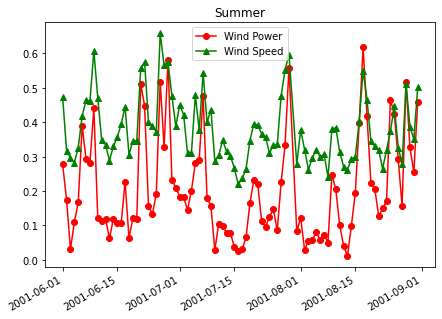

In [14]:
#wind power production vs wind speed in Septempber, 2001.
plt.figure(figsize=(7,5))
plt.plot(summer_sample.PowerProduction, 'r', marker='o')
plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])
plt.title('Summer')

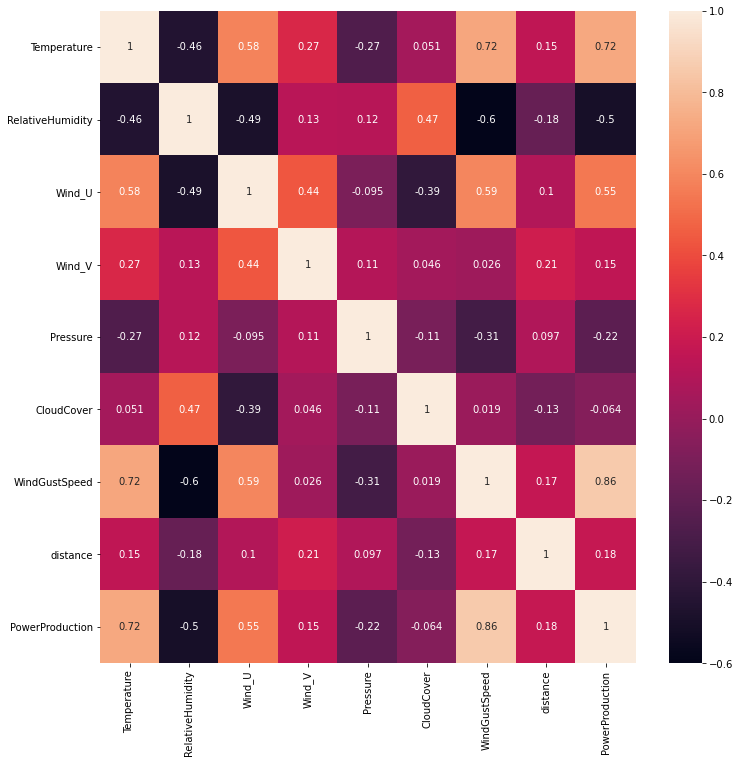

In [15]:
import seaborn as sns
df_small = winter_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

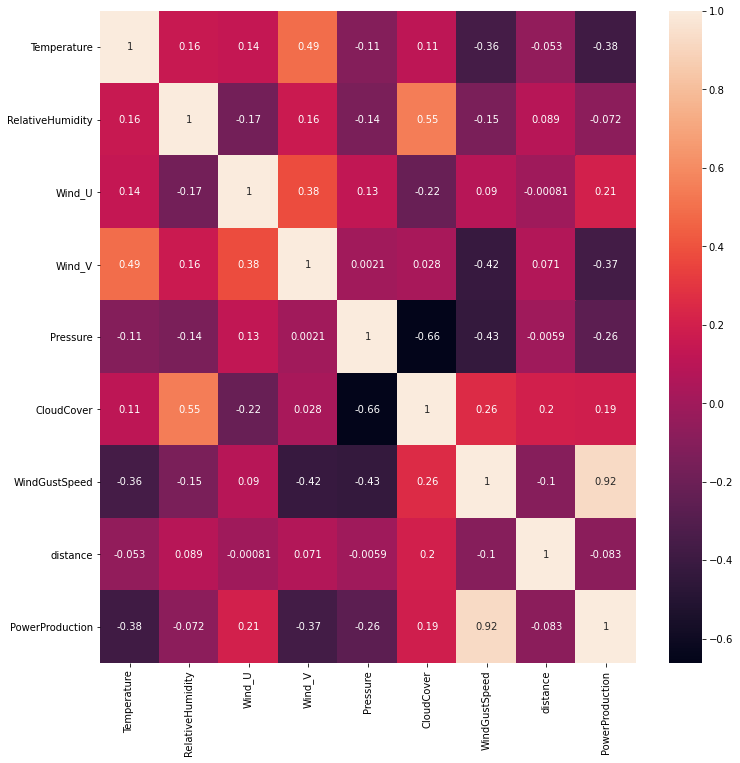

In [16]:
import seaborn as sns
df_small = spring_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

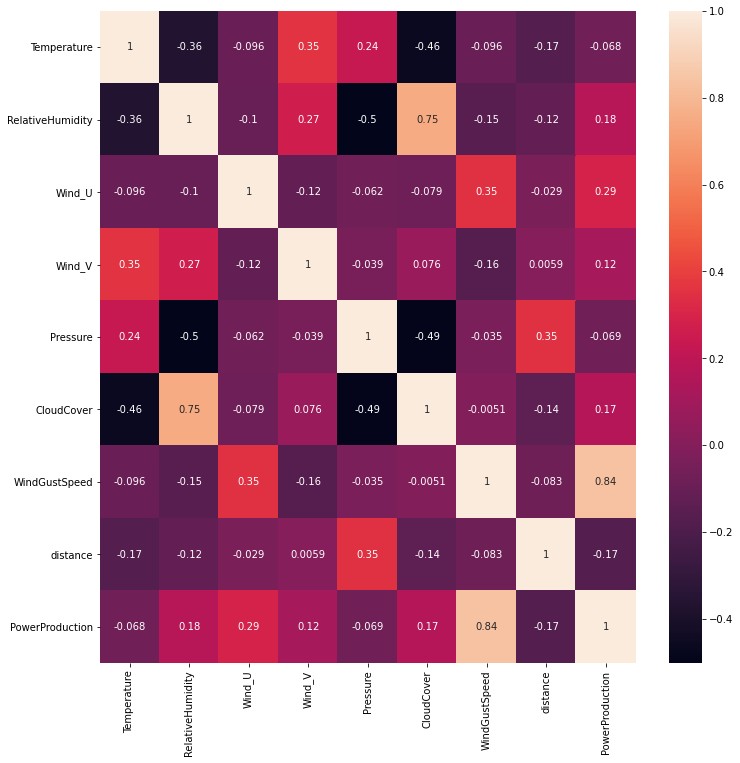

In [17]:
import seaborn as sns
df_small = summer_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

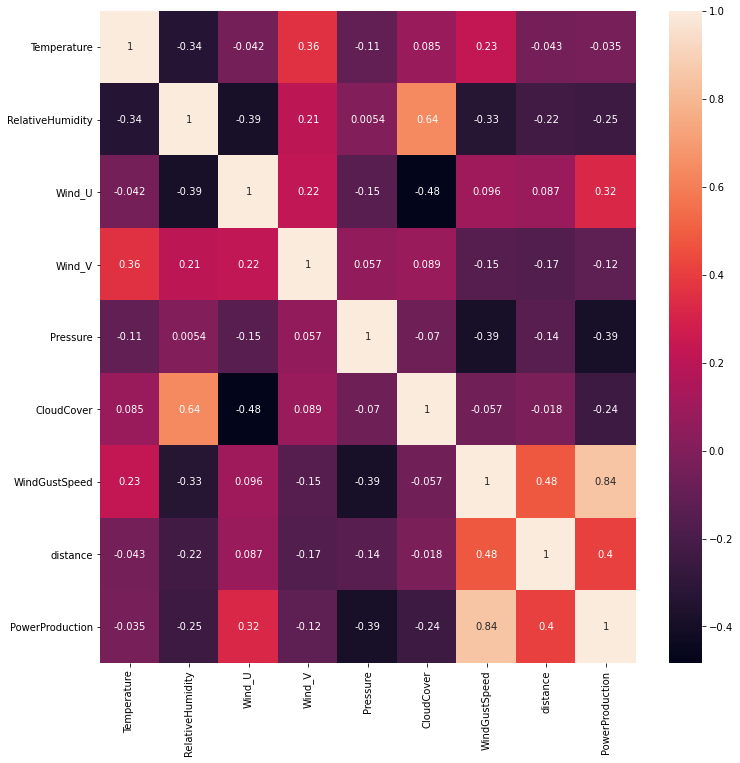

In [18]:
import seaborn as sns
df_small = autumn_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

###### maximum average wind speed in winter. wind speed and power production: 0.39740 & 0.36785. 
###### coorelation value of wind speed and power production 0.84-0.92. Maximum in spring. winter: 0.86

average speed and power: '[0.3974030519751385, 0.35907482114425426, 0.3776837012332993, 0.3089334330306463]  and 
[0.3678522127548779, 0.24794666216651665, 0.20183917846368593, 0.28534142063617124]'